# Creating simulated data for Zhen's dynamic fmri study

We have 10 runs. Each run is 10 minutes long. TR = 1.45 and there are 420 time point
Location of an example csv file (only acessable on Humbvee): /data/HBN-SSI/OUTPUT/pipeline_HBN-SSI/sub-0031133_ses-SSV9/roi_timeseries/_scan_FLANKERTASK/_compcor_ncomponents_5_selector_pc10.linear1.wm0.global0.motion1.quadratic1.gm0.compcor1.csf0/_bandpass_freqs_0.01.0.35/_mask_CC200_2mm

In [58]:
# importing some libraries

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import seaborn as sns
import os
#import pylab as plt



# Now actually starting to generate the simulated data
We have 10 runs. Each run is 10 minutes long. TR = 1.45 and there are 420 time point

Location of an example csv file (only acessable on Humbvee):
/data/HBN-SSI/OUTPUT/pipeline_HBN-SSI/sub-0031133_ses-SSV9/roi_timeseries/_scan_FLANKERTASK/_compcor_ncomponents_5_selector_pc10.linear1.wm0.global0.motion1.quadratic1.gm0.compcor1.csf0/_bandpass_freqs_0.01.0.35/_mask_CC200_2mm



In [49]:
# Generating a time series
TR = 1.45
volumes = 420
t = np.arange(0.0, TR*volumes+1, 1.45)
noise_level = 5
#print(t)

In [43]:
# Plot correlation coef
def plot_corrcoef(data,run,noise):
    # Calculate correlation coefficient 
    corrcoef = np.corrcoef(Yall_noise.transpose())


    fig, ax = plt.subplots()
    ax.set_title(["Run", run ,"noise level:" , noise])
    cax = ax.imshow(corrcoef, vmin=-1, vmax=1, interpolation='nearest', cmap=cm.coolwarm)
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1])
    cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar
    
    

    

we have a total of 200 ROIS - so need to generate 200 time series

size Yall_noise
(421, 200)
(421,)
1
[[1.         0.98158999 0.97984546 0.98154021]
 [0.98158999 1.         0.97801525 0.98134339]
 [0.97984546 0.97801525 1.         0.98058831]
 [0.98154021 0.98134339 0.98058831 1.        ]]


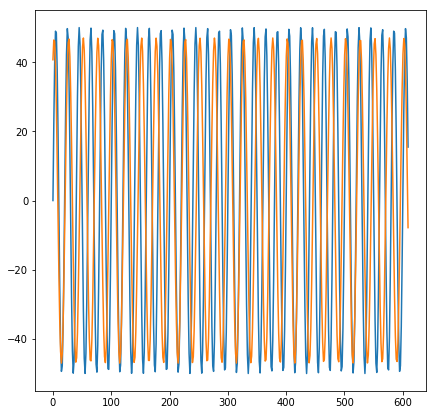

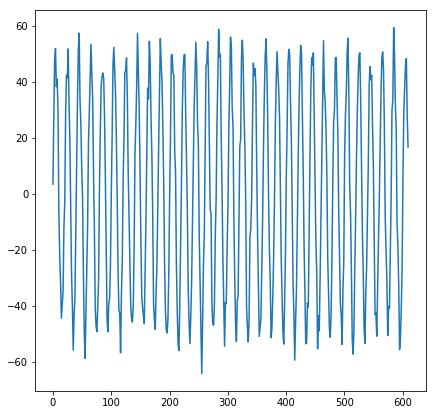

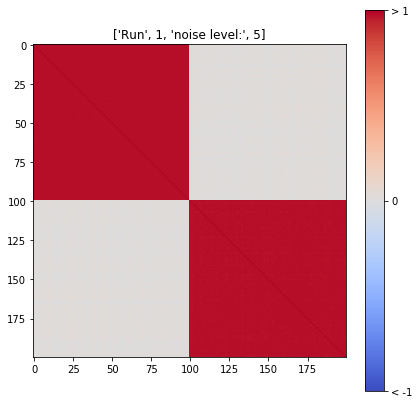

In [73]:
# generating data for the 1st visit
# TS = Time series
#import scipy.linalg

f1 = 0.05 # frequency of sine wave 1
f2 = 0.04 # frequency of sine wave 2
#shift = np.pi/4
# going to change this to 60 degrees
shift = np.pi/(180/60)
y1 = 50*np.sin(2 * np.pi * f1 * t ) # 0.05
y2 = 47*np.sin(2 * np.pi * f2 * t + shift ) # 0.04
plt.figure(0)
plt.plot(t, y1)
plt.plot(t, y2)
#print(np.ndim(y1))

#Yall = np.array([y1, y2])
Y1 = np.tile(y1, (100,1))
Y2 = np.tile(y2, (100,1))
#print(np.shape(Y1))
#print(np.shape(Y2))

#Yall = np.array([[Y1], [Y2]])
Yall = np.block([[Y1], [Y2]])
#print(np.shape(Yall))

# Need to transpose this
Yall = Yall.transpose()
r, c = Yall.shape
#print(r)
#print(c)
# Adding some random noise
noise = noise_level*np.random.standard_normal((r,c))
#print(noise.shape)
#print(np.shape(Yall))
#print(Yall)
Yall_noise = Yall + noise
#print(Yall_noise)

print("size Yall_noise")
print(Yall_noise.shape)
a =Yall_noise[:,0]
print(a.shape)
print(a.ndim)
plt.figure(1)
plt.plot(t, a)


plt.rcParams['figure.figsize'] = [7, 7]

# Calculate correlation coefficient 
corrcoef = np.corrcoef(Yall_noise.transpose())
print(corrcoef[0:4,0:4])

# ploting the correlation coefficient 
plot_corrcoef(Yall_noise.transpose(),1,noise_level)




# Now lets create a for loop for creating data with different noise levels 

0.5
5
10
20
40
60


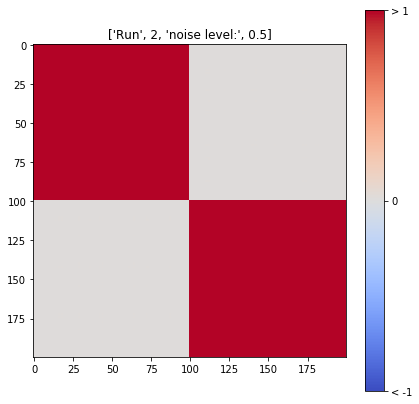

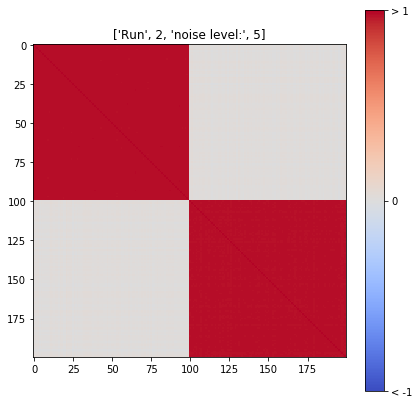

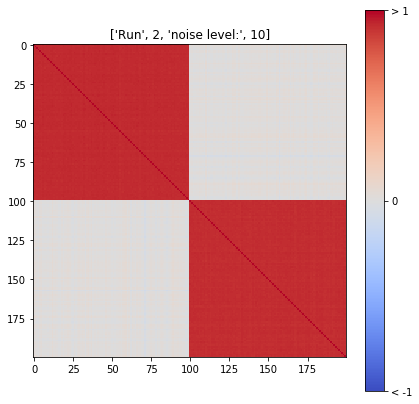

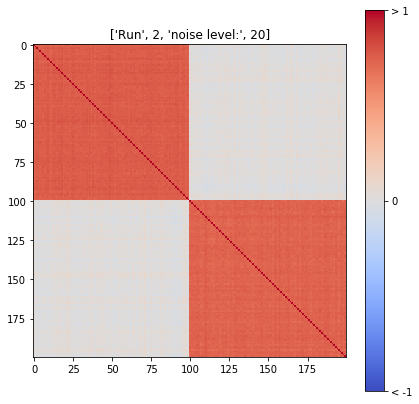

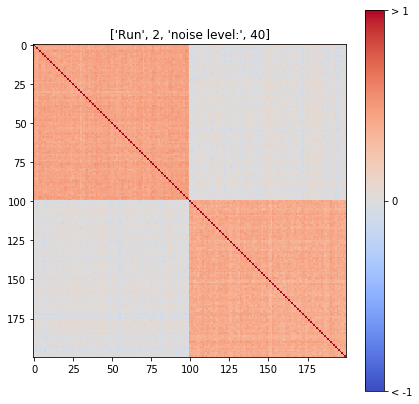

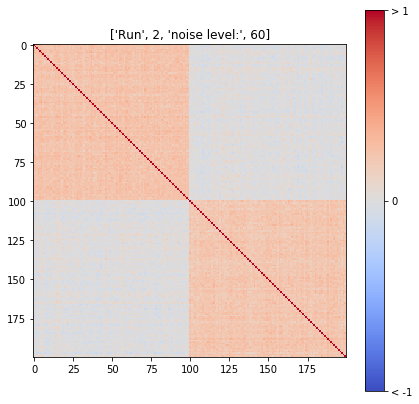

In [74]:
plt.rcParams['figure.figsize'] = [7, 7]
# different noise levels
noises = [ 0.5, 5, 10, 20, 40, 60]
for n in noises:
    noise = n*np.random.standard_normal((r,c))
    print(n)
    Yall_noise = Yall + noise
    #plt.figure()
    #plt.plot(t, Yall_noise[:,0])
    #plt.title(["Run", 1 ,"noise level:" , n])

    # ploting the correlation coefficient 
    plot_corrcoef(Yall_noise.transpose(),2,n)



# Calculate correlation coefficient 
##corrcoef = np.corrcoef(Yall_noise.transpose())
##print(corrcoef[0:4,0:4])

# ploting the correlation coefficient 
##plot_corrcoef(Yall_noise.transpose(),1,noise_level)





# How the header should look like

HEADER:

File	Sub-brick
		#	Mean_1  	Mean_2  	Mean_3  	Mean_4  	Mean_5  	Mean_6  	Mean_7  	Mean_8  	Mean_9  	Mean_10  	Mean_11  	Mean_12  	Mean_13  	Mean_14  	Mean_15  	Mean_16  	Mean_17  	Mean_18  	Mean_19  	Mean_20  	Mean_21  	Mean_22  	Mean_23  	Mean_24  	Mean_25  	Mean_26  	Mean_27     	Mean_28  	Mean_29  	Mean_30  	Mean_31  	Mean_32  	Mean_33  	Mean_34  	Mean_35  	Mean_36  	Mean_37  	Mean_38  	Mean_39  	Mean_40  	Mean_41  	Mean_42  	Mean_43  	Mean_
44  	Mean_45  	Mean_46  	Mean_47  	Mean_48  	Mean_49  	Mean_50  	Mean_51  	Mean_52  	Mean_53  	Mean_54  	Mean_55  	Mean_56  	Mean_57  	Mean_58  	Mean_59  	Mean_60  	Mean_61  	Mean_62  	Mean_63  	Mean_64  	Mean_65  	Mean_66  	Mean_67  	Mean_68  	Mean_69  	Mean_70  	Mean_71  	Mean_72     	Mean_73  	Mean_74  	Mean_75  	Mean_76  	Mean_77  	Mean_78  	Mean_79  	Mean_80  	Mean_81  	Mean_82  	Mean_83  	Mean_84  	Mean_85  	Mean_86  	Mean_87  	Mean_88  	Mean_
89  	Mean_90  	Mean_91  	Mean_92  	Mean_93  	Mean_94  	Mean_95  	Mean_96  	Mean_97  	Mean_98  	Mean_99  	Mean_100  	Mean_101  	Mean_102  	Mean_103  	Mean_104  	Mean_105  	Mean_106  	Mean_107  	Mean_108  	Mean_109  	Mean_110  	Mean_111  	Mean_112  	Mean_113  	Mean_114  	Mean_115  	Mean_116  	Mean_117    	Mean_118  	Mean_119  	Mean_120  	Mean_121  	Mean_122  	Mean_123  	Mean_124  	Mean_125  	Mean_126  	Mean_127  	Mean_128  	Mean_129  	Mean_130  	Mean_131  	Mean_132  	Mean_133  	Mean_
134  	Mean_135  	Mean_136  	Mean_137  	Mean_138  	Mean_139  	Mean_140  	Mean_141  	Mean_142  	Mean_143  	Mean_144  	Mean_145  	Mean_146  	Mean_147  	Mean_148  	Mean_149  	Mean_150  	Mean_151  	Mean_152  	Mean_153  	Mean_154  	Mean_155  	Mean_156  	Mean_157  	Mean_158  	Mean_159  	Mean_160  	Mean_161  	Mean_162    	Mean_163  	Mean_164  	Mean_165  	Mean_166  	Mean_167  	Mean_168  	Mean_169  	Mean_170  	Mean_171  	Mean_172  	Mean_173  	Mean_174  	Mean_175  	Mean_176  	Mean_177  	Mean_178  	Mean_
179  	Mean_180  	Mean_181  	Mean_182  	Mean_183  	Mean_184  	Mean_185  	Mean_186  	Mean_187  	Mean_188  	Mean_189  	Mean_190  	Mean_191  	Mean_192  	Mean_193  	Mean_194  	Mean_195  	Mean_196  	Mean_197  	Mean_198  	Mean_199  	Mean_200

In [75]:
#Saving file 
#np.savetxt('blah.csv', a, fmt='%.2f', delimiter=',', header=" #1,  #2,  #3,  #4")
head = "Mean_1	Mean_2	Mean_3	Mean_4	Mean_5	Mean_6	Mean_7	Mean_8	Mean_9  	Mean_10  	Mean_11  	Mean_12  	Mean_13  	Mean_14  	Mean_15  	Mean_16  	Mean_17  	Mean_18  	Mean_19  	Mean_20  	Mean_21  	Mean_22  	Mean_23  	Mean_24  	Mean_25  	Mean_26  	Mean_27     	Mean_28  	Mean_29  	Mean_30  	Mean_31  	Mean_32  	Mean_33  	Mean_34  	Mean_35  	Mean_36  	Mean_37  	Mean_38  	Mean_39  	Mean_40  	Mean_41  	Mean_42  	Mean_43  	Mean_44  	Mean_45  	Mean_46  	Mean_47  	Mean_48  	Mean_49  	Mean_50  	Mean_51  	Mean_52  	Mean_53  	Mean_54  	Mean_55  	Mean_56  	Mean_57  	Mean_58  	Mean_59  	Mean_60  	Mean_61  	Mean_62  	Mean_63  	Mean_64  	Mean_65  	Mean_66  	Mean_67  	Mean_68  	Mean_69  	Mean_70  	Mean_71  	Mean_72     	Mean_73  	Mean_74  	Mean_75  	Mean_76  	Mean_77  	Mean_78  	Mean_79  	Mean_80  	Mean_81  	Mean_82  	Mean_83  	Mean_84  	Mean_85  	Mean_86  	Mean_87  	Mean_88  	Mean_89  	Mean_90  	Mean_91  	Mean_92  	Mean_93  	Mean_94  	Mean_95  	Mean_96  	Mean_97  	Mean_98  	Mean_99  	Mean_100  	Mean_101  	Mean_102  	Mean_103  	Mean_104  	Mean_105  	Mean_106  	Mean_107  	Mean_108  	Mean_109  	Mean_110  	Mean_111  	Mean_112  	Mean_113  	Mean_114  	Mean_115  	Mean_116  	Mean_117    	Mean_118  	Mean_119  	Mean_120  	Mean_121  	Mean_122  	Mean_123  	Mean_124  	Mean_125  	Mean_126  	Mean_127  	Mean_128  	Mean_129  	Mean_130  	Mean_131  	Mean_132  	Mean_133  	Mean_134  	Mean_135  	Mean_136  	Mean_137  	Mean_138  	Mean_139  	Mean_140  	Mean_141  	Mean_142  	Mean_143  	Mean_144  	Mean_145  	Mean_146  	Mean_147  	Mean_148  	Mean_149  	Mean_150  	Mean_151  	Mean_152  	Mean_153  	Mean_154  	Mean_155  	Mean_156  	Mean_157  	Mean_158  	Mean_159  	Mean_160  	Mean_161  	Mean_162    	Mean_163  	Mean_164  	Mean_165  	Mean_166  	Mean_167  	Mean_168  	Mean_169  	Mean_170  	Mean_171  	Mean_172  	Mean_173  	Mean_174  	Mean_175  	Mean_176  	Mean_177  	Mean_178  	Mean_179  	Mean_180  	Mean_181  	Mean_182  	Mean_183  	Mean_184  	Mean_185  	Mean_186  	Mean_187  	Mean_188  	Mean_189  	Mean_190  	Mean_191  	Mean_192  	Mean_193  	Mean_194  	Mean_195  	Mean_196  	Mean_197  	Mean_198  	Mean_199  	Mean_200"

# Runs 1, 8, 9, and 10 have the same time series
# run 1
np.savetxt('run1.csv', Yall_noise, fmt='%.6f', delimiter='\t', header=head)
# run 8
np.savetxt('run8.csv', Yall_noise, fmt='%.6f', delimiter='\t', header=head)
# run 9
np.savetxt('run9.csv', Yall_noise, fmt='%.6f', delimiter='\t', header=head)
# run 10
np.savetxt('run10.csv', Yall_noise, fmt='%.6f', delimiter='\t', header=head)





# save runs with different noise levels
noises = [ 0.5, 5, 10, 20, 40, 60]
for n in noises:
    noise = noise_level*np.random.standard_normal((r,c))
    Yall_noise = Yall + noise
    
    # get current working directory
    cwd = os.getcwd()
    folder_path = cwd + "/noise_" + str(n) + "/" 
    print(folder_path)
    directory = os.path.dirname(folder_path)
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Runs 1, 8, 9 and 10
    # run 1
    np.savetxt(directory+'/run1.csv', Yall_noise, fmt='%.6f', delimiter='\t', header=head)
    # run 8
    np.savetxt(directory+'/run8.csv', Yall_noise, fmt='%.6f', delimiter='\t', header=head)
    # run 9
    np.savetxt(directory+'/run9.csv', Yall_noise, fmt='%.6f', delimiter='\t', header=head)
    # run 10
    np.savetxt(directory+'/run10.csv', Yall_noise, fmt='%.6f', delimiter='\t', header=head)


/Users/afranco/GIT/ZHEN_SIM_DATA
/Users/afranco/GIT/ZHEN_SIM_DATA/noise_0.5/
/Users/afranco/GIT/ZHEN_SIM_DATA/noise_0.5
/Users/afranco/GIT/ZHEN_SIM_DATA
/Users/afranco/GIT/ZHEN_SIM_DATA/noise_5/
/Users/afranco/GIT/ZHEN_SIM_DATA/noise_5
/Users/afranco/GIT/ZHEN_SIM_DATA
/Users/afranco/GIT/ZHEN_SIM_DATA/noise_10/
/Users/afranco/GIT/ZHEN_SIM_DATA/noise_10
/Users/afranco/GIT/ZHEN_SIM_DATA
/Users/afranco/GIT/ZHEN_SIM_DATA/noise_20/
/Users/afranco/GIT/ZHEN_SIM_DATA/noise_20
/Users/afranco/GIT/ZHEN_SIM_DATA
/Users/afranco/GIT/ZHEN_SIM_DATA/noise_40/
/Users/afranco/GIT/ZHEN_SIM_DATA/noise_40
/Users/afranco/GIT/ZHEN_SIM_DATA
/Users/afranco/GIT/ZHEN_SIM_DATA/noise_60/
/Users/afranco/GIT/ZHEN_SIM_DATA/noise_60


# run2, run6 and run7

(200, 421)
(421, 200)
[[  0.           0.           0.         ...  33.23401872  33.23401872
   33.23401872]
 [ 21.99695849  21.99695849  21.99695849 ...  21.13997514  21.13997514
   21.13997514]
 [ 39.50775062  39.50775062  39.50775062 ...   6.91458886   6.91458886
    6.91458886]
 ...
 [ 47.04403845  47.04403845  47.04403845 ... -24.80873906 -24.80873906
  -24.80873906]
 [ 34.79563983  34.79563983  34.79563983 ... -36.07254272 -36.07254272
  -36.07254272]
 [ 15.45084972  15.45084972  15.45084972 ... -43.69949484 -43.69949484
  -43.69949484]]
/Users/afranco/GIT/ZHEN_SIM_DATA/noise_0.5/
/Users/afranco/GIT/ZHEN_SIM_DATA/noise_5/
/Users/afranco/GIT/ZHEN_SIM_DATA/noise_10/
/Users/afranco/GIT/ZHEN_SIM_DATA/noise_20/
/Users/afranco/GIT/ZHEN_SIM_DATA/noise_40/
/Users/afranco/GIT/ZHEN_SIM_DATA/noise_60/


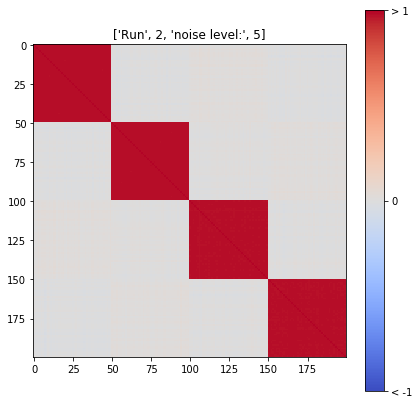

In [76]:
f1 = 0.05 # frequency of sine wave 1
f2 = 0.04 # frequency of sine wave 2
f1_add = 0.01
f2_add = 0.005

# Signal 1
y1_1 = 50*np.sin(2 * np.pi * f1 * t ) # 0.05 Hz
y1_2 = 50*np.sin(2 * np.pi * (f1+f1_add) * t + np.pi/2) # 0.06Hz+ 90o

# Signal 2
shift = np.pi/4
y2_1 = 47*np.sin(2 * np.pi * f2 * t + shift ) # 0.04Hz
y2_2 = 47*np.sin(2 * np.pi * (f2-f2_add) * t + shift + np.pi/2 ) # 0.035Hz + 90o

# Creating the large matrix
Y1_1 = np.tile(y1_1, (50,1))
Y1_2 = np.tile(y1_2, (50,1))
Y2_1 = np.tile(y2_1, (50,1))
Y2_2 = np.tile(y2_2, (50,1))
#print(np.shape(Y1_1))
#print(np.shape(Y2_1))

# combining all results
Yall = np.block([[Y1_1], [Y1_2], [Y2_1], [Y2_2]])
print(np.shape(Yall))

# Need to transpose this
Yall = Yall.transpose()
print(np.shape(Yall))
print(Yall)
# Adding random noise
noise = noise_level*np.random.standard_normal((r,c))
Yall_noise = Yall + noise

# Runs 2, 6, and 7
# run 2
np.savetxt('run2.csv', Yall_noise, fmt='%.6f', delimiter='\t', header=head)
# run 6
np.savetxt('run6.csv', Yall_noise, fmt='%.6f', delimiter='\t', header=head)
# run 7
np.savetxt('run7.csv', Yall_noise, fmt='%.6f', delimiter='\t', header=head)


plot_corrcoef(Yall_noise.transpose(),2,noise_level)


# save runs with different noise levels
noises = [ 0.5, 5, 10, 20, 40, 60]
for n in noises:
    noise = noise_level*np.random.standard_normal((r,c))
    Yall_noise = Yall + noise
    
    # get current working directory
    cwd = os.getcwd()
    folder_path = cwd + "/noise_" + str(n) + "/" 
    print(folder_path)
    directory = os.path.dirname(folder_path)
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Runs 2, 6, and 7 
    # run 2
    np.savetxt(directory+'/run2.csv', Yall_noise, fmt='%.6f', delimiter='\t', header=head)
    # run 6
    np.savetxt(directory+'/run6.csv', Yall_noise, fmt='%.6f', delimiter='\t', header=head)
    # run 7
    np.savetxt(directory+'/run7.csv', Yall_noise, fmt='%.6f', delimiter='\t', header=head)
  


# run3, run4, and run5

[[-0.16369167 -0.14547833 -0.15977463 -0.1660395 ]
 [-0.14600251 -0.13033788 -0.14504847 -0.15119443]
 [-0.15959331 -0.14181484 -0.15696644 -0.16394355]
 [-0.15518347 -0.13873011 -0.15225196 -0.1612951 ]
 [-0.15194294 -0.13736428 -0.14882893 -0.1570763 ]
 [ 0.97768885  0.97915916  0.97894962  0.97957496]
 [ 0.9787704   0.9787188   0.97838994  0.98031969]
 [ 0.97834927  0.98025689  0.97862282  0.98181264]
 [ 0.97786401  0.97825061  0.97752854  0.97983998]
 [ 0.97678056  0.97953574  0.97805621  0.98047109]
 [ 0.97925195  0.97732106  0.97947788  0.98080072]
 [ 0.97890309  0.98037061  0.97833222  0.98120375]
 [ 0.97923395  0.97892367  0.97875448  0.97927185]
 [ 0.976398    0.97833338  0.97911668  0.98081439]
 [ 0.97620218  0.97787305  0.9779398   0.98119876]]
/Users/afranco/GIT/ZHEN_SIM_DATA
/Users/afranco/GIT/ZHEN_SIM_DATA/noise_0.5/
/Users/afranco/GIT/ZHEN_SIM_DATA/noise_0.5
/Users/afranco/GIT/ZHEN_SIM_DATA
/Users/afranco/GIT/ZHEN_SIM_DATA/noise_5/
/Users/afranco/GIT/ZHEN_SIM_DATA/noise_

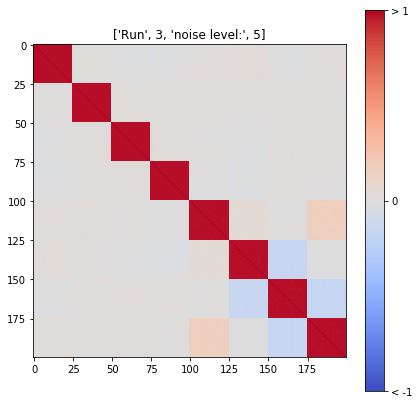

In [72]:
f1 = 0.05 # frequency of sine wave 1
f2 = 0.04 # frequency of sine wave 2
f1_add = 0.01
f1_add2 = 0.005
f2_add = 0.005
f2_add2 = 0.0025

y1_1_1 = 50*np.sin(2 * np.pi * f1 * t ) # 0.050Hz
y1_1_2 = 50*np.sin(2 * np.pi * (f1+f1_add+f1_add2) * t + np.pi/4 ) # 0.065Hz +45o
y1_2_1 = 50*np.sin(2 * np.pi * (f1+f1_add) * t + np.pi/2)  # 0.060Hz + 90o
y1_2_2 = 50*np.sin(2 * np.pi * (f1+f1_add2) * t + np.pi/2 + np.pi/4)  #0.055Hz + 90o + 45o

shift = np.pi/4
y2_1_1 = 47*np.sin(2 * np.pi * f2 * t + shift ) # 0.04Hz
y2_1_2 = 47*np.sin(2 * np.pi * (f2-f2_add-f2_add2) * t + shift + np.pi/4) # 0.0325Hz + 45o 
y2_2_1 = 47*np.sin(2 * np.pi * (f2-f2_add) * t + shift + np.pi/2 ) # 0.035Hz + 90o
y2_2_2 = 47*np.sin(2 * np.pi * (f2-f2_add2) * t + shift + np.pi/2 + np.pi/4) # 0.0375Hz+ 90o + 45o

# Creating the large matrix
Y1_1_1 = np.tile(y1_1_1, (25,1))
Y1_1_2 = np.tile(y1_1_2, (25,1))
Y1_2_1 = np.tile(y1_2_1, (25,1))
Y1_2_2 = np.tile(y1_2_2, (25,1))
Y2_1_1 = np.tile(y2_1_1, (25,1))
Y2_1_2 = np.tile(y2_1_2, (25,1))
Y2_2_1 = np.tile(y2_2_1, (25,1))
Y2_2_2 = np.tile(y2_2_2, (25,1))

#print(np.shape(Y1_1))
#print(np.shape(Y2_1))

# combining all results
Yall = np.block([[Y1_1_1], [Y1_1_2], 
                 [Y1_2_1], [Y1_2_2], 
                 [Y2_1_1], [Y2_1_2], 
                 [Y2_2_1], [Y2_2_2]])
#print(np.shape(Yall))

# Need to transpose this
Yall = Yall.transpose()
#print(np.shape(Yall))
#print(Yall)
noise = noise_level*np.random.standard_normal((r,c))
Yall_noise = Yall + noise

# Runs 3, 4, and 5
# run 3
np.savetxt('run3.csv', Yall_noise, fmt='%.6f', delimiter='\t', header=head)
# run 4
np.savetxt('run4.csv', Yall_noise, fmt='%.6f', delimiter='\t', header=head)
# run 5
np.savetxt('run5.csv', Yall_noise, fmt='%.6f', delimiter='\t', header=head)


plot_corrcoef(Yall_noise.transpose(),3,noise_level)
# Calculate correlation coefficient 
corrcoef = np.corrcoef(Yall_noise.transpose())
print(corrcoef[170:185,195:-1])



# save runs with different noise levels
noises = [ 0.5, 5, 10, 20, 40, 60]
for n in noises:
    noise = noise_level*np.random.standard_normal((r,c))
    Yall_noise = Yall + noise
    
    # get current working directory
    cwd = os.getcwd()
    print(cwd)
    folder_path = cwd + "/noise_" + str(n) + "/" 
    print(folder_path)
    directory = os.path.dirname(folder_path)
    print(directory)
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Runs 3, 4, and 5
    # run 3
    np.savetxt(directory+'/run3.csv', Yall_noise, fmt='%.6f', delimiter='\t', header=head)
    # run 4
    np.savetxt(directory+'/run4.csv', Yall_noise, fmt='%.6f', delimiter='\t', header=head)
    # run 5
    np.savetxt(directory+'/run5.csv', Yall_noise, fmt='%.6f', delimiter='\t', header=head)
